In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import torch

In [64]:
import os
import pandas as pd

# Ajoute une colonne 'video_id' incrémentale aux fichiers CSV dans un dossier
def add_video_id(input_folder, output_folder):
    # Vérifier si le dossier de sortie existe, sinon le créer
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)
    
    # Liste des fichiers CSV dans le dossier
    csv_files = [f for f in os.listdir(input_folder) if f.endswith(".csv")]
    csv_files.sort()  # Tri pour un ordre déterminé (par exemple, alphabétique)
    
    # Parcourir les fichiers CSV avec un compteur pour les 'video_id'
    for idx, file_name in enumerate(csv_files, start=1):  # 'start=1' pour commencer à 1
        input_csv = os.path.join(input_folder, file_name)
        output_csv = os.path.join(output_folder, file_name)
        
        # Charger les données
        data = pd.read_csv(input_csv)
        
        # Ajouter la colonne 'video_id' avec la valeur du compteur
        data['video_id'] = idx
        
        # Réorganiser les colonnes pour mettre 'video_id' en première position
        columns = ['video_id'] + [col for col in data.columns if col != 'video_id']
        data = data[columns]
        
        # Sauvegarder le fichier modifié
        data.to_csv(output_csv, index=False)
        print(f"Fichier traité : {file_name} | video_id attribué : {idx}. Sauvegardé sous : {output_csv}")

# Exemple d'utilisation de la fonction
input_folder = "C:/Users/h/Desktop/MASTER IAAD/S3/projet2/Data/annotations"
output_folder = "C:/Users/h/Desktop/MASTER IAAD/S3/projet2/Data/annotations"

add_video_id(input_folder, output_folder)


Fichier traité : video1.csv | video_id attribué : 1. Sauvegardé sous : C:/Users/h/Desktop/MASTER IAAD/S3/projet2/Data/annotations\video1.csv
Fichier traité : video10.csv | video_id attribué : 2. Sauvegardé sous : C:/Users/h/Desktop/MASTER IAAD/S3/projet2/Data/annotations\video10.csv
Fichier traité : video11.csv | video_id attribué : 3. Sauvegardé sous : C:/Users/h/Desktop/MASTER IAAD/S3/projet2/Data/annotations\video11.csv
Fichier traité : video12.csv | video_id attribué : 4. Sauvegardé sous : C:/Users/h/Desktop/MASTER IAAD/S3/projet2/Data/annotations\video12.csv
Fichier traité : video2.csv | video_id attribué : 5. Sauvegardé sous : C:/Users/h/Desktop/MASTER IAAD/S3/projet2/Data/annotations\video2.csv
Fichier traité : video3.csv | video_id attribué : 6. Sauvegardé sous : C:/Users/h/Desktop/MASTER IAAD/S3/projet2/Data/annotations\video3.csv
Fichier traité : video4.csv | video_id attribué : 7. Sauvegardé sous : C:/Users/h/Desktop/MASTER IAAD/S3/projet2/Data/annotations\video4.csv
Fichier

### 1. Chargement des données

In [65]:
import pandas as pd

# Charger les données
data = pd.read_csv("C:/Users/h/Desktop/MASTER IAAD/S3/projet2/Data/annotations/video1.csv")

# Afficher les premières lignes
print(data.head())

# Informations sur les données
print(data.info())

   video_id  frame_id  object_id object_type   position_x  position_y  \
0         1         0          1         car  1169.210449  363.842346   
1         1         0          2         car   411.912994  332.468170   
2         1         0          3         car    46.771355  388.645050   
3         1         0          4         car   153.213562  376.159637   
4         1         0          5         car  1031.436035  350.034912   

   position_z  object_length  object_width  object_height  heading  
0           0     188.707153    220.168457     188.707153        0  
1           0      46.878052     70.140747      46.878052        0  
2           0     109.515442     93.094376     109.515442        0  
3           0      82.776001    138.742676      82.776001        0  
4           0     104.149475    134.557617     104.149475        0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6550 entries, 0 to 6549
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtyp

### 2. Nettoyage des données

In [66]:

# Fonction pour nettoyer les données dans un fichier CSV
def clean_csv_file(input_csv, output_csv):
    """
    Nettoie un fichier CSV en supprimant les valeurs manquantes (remplies par 0),
    les doublons et sauvegarde les données nettoyées dans un nouveau fichier.

    Parameters:
        input_csv (str): Chemin du fichier CSV d'entrée.
        output_csv (str): Chemin du fichier CSV de sortie.
    """
    # Charger les données
    data = pd.read_csv(input_csv)
    print(f"Traitement de : {input_csv}")

    # Vérifier les valeurs manquantes
    print("Valeurs manquantes avant nettoyage :")
    print(data.isnull().sum())

    # Remplacer ou supprimer les valeurs manquantes
    data = data.fillna(0)

    # Vérifier et supprimer les doublons
    print(f"Nombre de doublons avant suppression : {data.duplicated().sum()}")
    data = data.drop_duplicates()

    # Sauvegarder les données nettoyées
    data.to_csv(output_csv, index=False)
    print(f"Fichier nettoyé sauvegardé : {output_csv}")


In [67]:
# Fonction pour appliquer le nettoyage à tous les fichiers dans un dossier
def clean_all_csv_files(input_folder, output_folder):
    """
    Nettoie tous les fichiers CSV dans un dossier et sauvegarde les fichiers nettoyés
    dans un dossier de sortie.

    Parameters:
        input_folder (str): Chemin du dossier contenant les fichiers CSV d'entrée.
        output_folder (str): Chemin du dossier où sauvegarder les fichiers nettoyés.
    """
    # Vérifier si le dossier de sortie existe, sinon le créer
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # Parcourir tous les fichiers CSV dans le dossier d'entrée
    for file_name in os.listdir(input_folder):
        if file_name.endswith(".csv"):
            input_csv = os.path.join(input_folder, file_name)
            output_csv = os.path.join(output_folder, file_name)
            clean_csv_file(input_csv, output_csv)



In [68]:
# Exemple d'utilisation
input_folder = "C:/Users/h/Desktop/MASTER IAAD/S3/projet2/Data/annotations"
output_folder = "C:/Users/h/Desktop/MASTER IAAD/S3/projet2/Data/cleaned_annotations"

clean_all_csv_files(input_folder, output_folder)

Traitement de : C:/Users/h/Desktop/MASTER IAAD/S3/projet2/Data/annotations\video1.csv
Valeurs manquantes avant nettoyage :
video_id         0
frame_id         0
object_id        0
object_type      0
position_x       0
position_y       0
position_z       0
object_length    0
object_width     0
object_height    0
heading          0
dtype: int64
Nombre de doublons avant suppression : 0
Fichier nettoyé sauvegardé : C:/Users/h/Desktop/MASTER IAAD/S3/projet2/Data/cleaned_annotations\video1.csv
Traitement de : C:/Users/h/Desktop/MASTER IAAD/S3/projet2/Data/annotations\video10.csv
Valeurs manquantes avant nettoyage :
video_id         0
frame_id         0
object_id        0
object_type      0
position_x       0
position_y       0
position_z       0
object_length    0
object_width     0
object_height    0
heading          0
dtype: int64
Nombre de doublons avant suppression : 0
Fichier nettoyé sauvegardé : C:/Users/h/Desktop/MASTER IAAD/S3/projet2/Data/cleaned_annotations\video10.csv
Traitement d

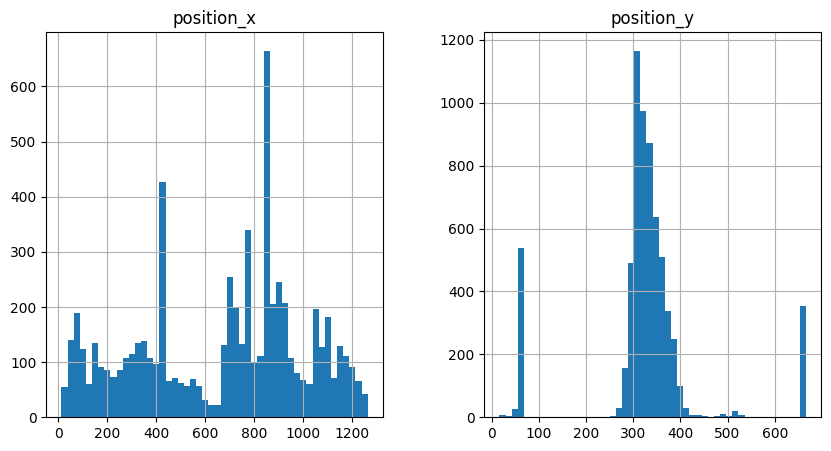

In [69]:
# Détecter les valeurs aberrantes
import matplotlib.pyplot as plt
data = pd.read_csv("C:/Users/h/Desktop/MASTER IAAD/S3/projet2/Data/cleaned_annotations/video1.csv")
# Visualiser les distributions
data[["position_x", "position_y"]].hist(bins=50, figsize=(10, 5))
plt.show()

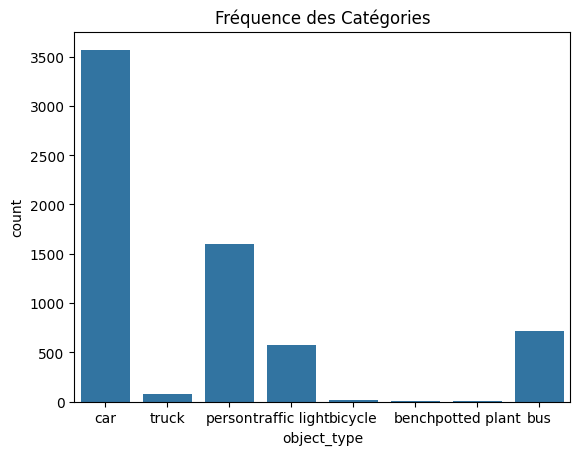

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt

# Exemple : Supposons que la colonne s'appelle 'object_type'
sns.countplot(data=data, x='object_type')
plt.title("Fréquence des Catégories")
plt.show()


### suppression des classes non valides 

In [71]:
import os
import pandas as pd

def filter_one_csv(input_file, output_file, valid_classes):
    # Charger les données
    data = pd.read_csv(input_file)
    
    # Filtrer les lignes où 'object_type' est dans valid_classes
    filtered_data = data[data['object_type'].isin(valid_classes)]
    
    # Sauvegarder les données filtrées dans un nouveau fichier CSV
    filtered_data.to_csv(output_file, index=False)
    print(f"Le fichier filtré a été sauvegardé dans : {output_file}")

def filter_all_csv_files(input_folder, output_folder, valid_classes):
    # Vérifier si le dossier de sortie existe, sinon le créer
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # Parcourir tous les fichiers CSV dans le dossier d'entrée
    for file_name in os.listdir(input_folder):
        if file_name.endswith(".csv"):
            input_file = os.path.join(input_folder, file_name)
            output_file = os.path.join(output_folder, file_name)
            
            # Appliquer le filtrage
            filter_one_csv(input_file, output_file, valid_classes)

# Exemple d'utilisation
input_folder = "C:/Users/h/Desktop/MASTER IAAD/S3/projet2/Data/cleaned_annotations"
output_folder = "C:/Users/h/Desktop/MASTER IAAD/S3/projet2/Data/cleaned_annotations"
valid_classes = ['person', 'bicycle', 'car', 'motorcycle', 'bus', 'train', 'truck']

filter_all_csv_files(input_folder, output_folder, valid_classes)


Le fichier filtré a été sauvegardé dans : C:/Users/h/Desktop/MASTER IAAD/S3/projet2/Data/cleaned_annotations\video1.csv
Le fichier filtré a été sauvegardé dans : C:/Users/h/Desktop/MASTER IAAD/S3/projet2/Data/cleaned_annotations\video10.csv
Le fichier filtré a été sauvegardé dans : C:/Users/h/Desktop/MASTER IAAD/S3/projet2/Data/cleaned_annotations\video11.csv
Le fichier filtré a été sauvegardé dans : C:/Users/h/Desktop/MASTER IAAD/S3/projet2/Data/cleaned_annotations\video12.csv
Le fichier filtré a été sauvegardé dans : C:/Users/h/Desktop/MASTER IAAD/S3/projet2/Data/cleaned_annotations\video2.csv
Le fichier filtré a été sauvegardé dans : C:/Users/h/Desktop/MASTER IAAD/S3/projet2/Data/cleaned_annotations\video3.csv
Le fichier filtré a été sauvegardé dans : C:/Users/h/Desktop/MASTER IAAD/S3/projet2/Data/cleaned_annotations\video4.csv
Le fichier filtré a été sauvegardé dans : C:/Users/h/Desktop/MASTER IAAD/S3/projet2/Data/cleaned_annotations\video5.csv
Le fichier filtré a été sauvegardé da

In [72]:
data = pd.read_csv("C:/Users/h/Desktop/MASTER IAAD/S3/projet2/Data/cleaned_annotations/video1.csv")

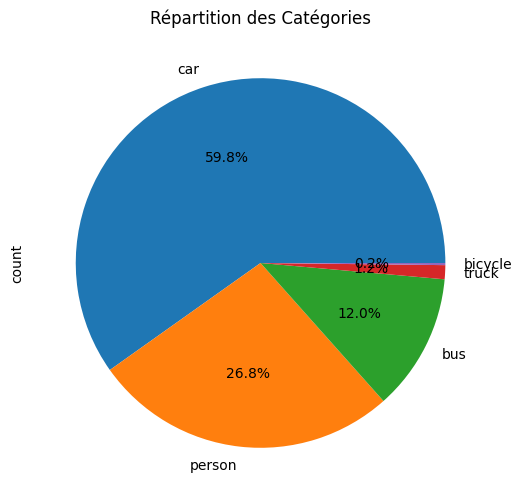

In [73]:
data['object_type'].value_counts().plot.pie(autopct='%1.1f%%', figsize=(6, 6))
plt.title("Répartition des Catégories")
plt.show()


### 3. Normalisation des données

In [74]:
import os
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

def normalize_columns(input_file, output_file, columns_to_normalize):
    # Charger les données
    data = pd.read_csv(input_file)

    # Vérifier si les colonnes à normaliser existent dans le fichier
    for column in columns_to_normalize:
        if column not in data.columns:
            raise ValueError(f"Colonne '{column}' non trouvée dans {input_file}")

    # Appliquer la normalisation
    scaler = MinMaxScaler()
    data[columns_to_normalize] = scaler.fit_transform(data[columns_to_normalize])

    # Sauvegarder le fichier normalisé
    data.to_csv(output_file, index=False)
    print(f"Les colonnes normalisées ont été sauvegardées dans : {output_file}")

def normalize_all_csv_files(input_folder, output_folder, columns_to_normalize):
    # Vérifier si le dossier de sortie existe, sinon le créer
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # Parcourir tous les fichiers CSV dans le dossier d'entrée
    for file_name in os.listdir(input_folder):
        if file_name.endswith(".csv"):
            input_file = os.path.join(input_folder, file_name)
            output_file = os.path.join(output_folder, file_name)

            # Normaliser les colonnes
            try:
                normalize_columns(input_file, output_file, columns_to_normalize)
            except ValueError as e:
                print(f"Erreur pour {file_name} : {e}")

# Exemple d'utilisation
input_folder = "C:/Users/h/Desktop/MASTER IAAD/S3/projet2/Data/cleaned_annotations"
output_folder = "C:/Users/h/Desktop/MASTER IAAD/S3/projet2/Data/cleaned_annotations"
columns_to_normalize = ["position_x", "position_y", "position_z", "object_length", "object_width", "object_height"]

normalize_all_csv_files(input_folder, output_folder, columns_to_normalize)


Les colonnes normalisées ont été sauvegardées dans : C:/Users/h/Desktop/MASTER IAAD/S3/projet2/Data/cleaned_annotations\video1.csv
Les colonnes normalisées ont été sauvegardées dans : C:/Users/h/Desktop/MASTER IAAD/S3/projet2/Data/cleaned_annotations\video10.csv
Les colonnes normalisées ont été sauvegardées dans : C:/Users/h/Desktop/MASTER IAAD/S3/projet2/Data/cleaned_annotations\video11.csv
Les colonnes normalisées ont été sauvegardées dans : C:/Users/h/Desktop/MASTER IAAD/S3/projet2/Data/cleaned_annotations\video12.csv
Les colonnes normalisées ont été sauvegardées dans : C:/Users/h/Desktop/MASTER IAAD/S3/projet2/Data/cleaned_annotations\video2.csv
Les colonnes normalisées ont été sauvegardées dans : C:/Users/h/Desktop/MASTER IAAD/S3/projet2/Data/cleaned_annotations\video3.csv
Les colonnes normalisées ont été sauvegardées dans : C:/Users/h/Desktop/MASTER IAAD/S3/projet2/Data/cleaned_annotations\video4.csv
Les colonnes normalisées ont été sauvegardées dans : C:/Users/h/Desktop/MASTER I

In [75]:
data = pd.read_csv("C:/Users/h/Desktop/MASTER IAAD/S3/projet2/Data/cleaned_annotations/video1.csv")
# Afficher les premières lignes des colonnes normalisées
print(data.head())

   video_id  frame_id  object_id object_type  position_x  position_y  \
0         1         0          1         car    0.922576    0.251611   
1         1         0          2         car    0.318802    0.173868   
2         1         0          3         car    0.027684    0.313070   
3         1         0          4         car    0.112547    0.282132   
4         1         0          5         car    0.812732    0.217397   

   position_z  object_length  object_width  object_height  heading  
0         0.0       0.394477      0.183967       0.394477        0  
1         0.0       0.061528      0.050349       0.061528        0  
2         0.0       0.208572      0.070792       0.208572        0  
3         0.0       0.145800      0.111448       0.145800        0  
4         0.0       0.195975      0.107720       0.195975        0  


### 4. Encodage des caractéristiques catégorielles

In [76]:
import os
import pandas as pd

def one_hot_encode_object_type(input_file, output_file, column_name="object_type"):
    # Charger les données
    data = pd.read_csv(input_file)

    # Vérifier si la colonne à encoder existe
    if column_name not in data.columns:
        raise ValueError(f"La colonne '{column_name}' n'existe pas dans {input_file}.")

    # Appliquer l'encodage one-hot
    data = pd.get_dummies(data, columns=[column_name], prefix="type")

    # Sauvegarder le fichier encodé
    data.to_csv(output_file, index=False)
    print(f"Encodage one-hot effectué et sauvegardé dans : {output_file}")

def encode_all_csv_files(input_folder, output_folder, column_name="object_type"):
    # Vérifier si le dossier de sortie existe, sinon le créer
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # Parcourir tous les fichiers CSV dans le dossier d'entrée
    for file_name in os.listdir(input_folder):
        if file_name.endswith(".csv"):
            input_file = os.path.join(input_folder, file_name)
            output_file = os.path.join(output_folder, file_name)

            # Appliquer l'encodage one-hot
            try:
                one_hot_encode_object_type(input_file, output_file, column_name)
            except ValueError as e:
                print(f"Erreur pour {file_name} : {e}")

# Exemple d'utilisation
input_folder = "C:/Users/h/Desktop/MASTER IAAD/S3/projet2/Data/cleaned_annotations"
output_folder = "C:/Users/h/Desktop/MASTER IAAD/S3/projet2/Data/cleaned_annotations"
column_name = "object_type"

encode_all_csv_files(input_folder, output_folder, column_name)


Encodage one-hot effectué et sauvegardé dans : C:/Users/h/Desktop/MASTER IAAD/S3/projet2/Data/cleaned_annotations\video1.csv
Encodage one-hot effectué et sauvegardé dans : C:/Users/h/Desktop/MASTER IAAD/S3/projet2/Data/cleaned_annotations\video10.csv
Encodage one-hot effectué et sauvegardé dans : C:/Users/h/Desktop/MASTER IAAD/S3/projet2/Data/cleaned_annotations\video11.csv
Encodage one-hot effectué et sauvegardé dans : C:/Users/h/Desktop/MASTER IAAD/S3/projet2/Data/cleaned_annotations\video12.csv
Encodage one-hot effectué et sauvegardé dans : C:/Users/h/Desktop/MASTER IAAD/S3/projet2/Data/cleaned_annotations\video2.csv
Encodage one-hot effectué et sauvegardé dans : C:/Users/h/Desktop/MASTER IAAD/S3/projet2/Data/cleaned_annotations\video3.csv
Encodage one-hot effectué et sauvegardé dans : C:/Users/h/Desktop/MASTER IAAD/S3/projet2/Data/cleaned_annotations\video4.csv
Encodage one-hot effectué et sauvegardé dans : C:/Users/h/Desktop/MASTER IAAD/S3/projet2/Data/cleaned_annotations\video5.c

### 5. Regrouper les données par object_id et trier par frame_id

In [85]:
# 1. Fusionner tous les fichiers CSV
def load_and_merge_csvs(input_folder):
    all_data = []
    for file_name in os.listdir(input_folder):
        if file_name.endswith(".csv"):
            file_path = os.path.join(input_folder, file_name)
            data = pd.read_csv(file_path)
            all_data.append(data)
    merged_data = pd.concat(all_data, ignore_index=True)
    return merged_data

input_folder = "C:/Users/h/Desktop/MASTER IAAD/S3/projet2/Data/cleaned_annotations"
data = load_and_merge_csvs(input_folder)
data

,video_id,frame_id,object_id,position_x,position_y,position_z,object_length,object_width,object_height,heading,type_bicycle,type_bus,type_car,type_person,type_truck,type_motorcycle,type_train
0,1,0,1,0.922576,0.251611,0.0,0.394477,0.183967,0.394477,0,False,False,True,False,False,NaN,NaN
1,1,0,2,0.318802,0.173868,0.0,0.061528,0.050349,0.061528,0,False,False,True,False,False,NaN,NaN
2,1,0,3,0.027684,0.313070,0.0,0.208572,0.070792,0.208572,0,False,False,True,False,False,NaN,NaN
3,1,0,4,0.112547,0.282132,0.0,0.145800,0.111448,0.145800,0,False,False,True,False,False,NaN,NaN
4,1,0,5,0.812732,0.217397,0.0,0.195975,0.107720,0.195975,0,False,False,True,False,False,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46433,12,1211,1163,0.661443,0.462582,0.0,0.219223,0.332629,0.219223,0,NaN,False,True,False,False,NaN,NaN
46434,12,1211,1166,0.593301,0.319538,0.0,0.186839,0.265090,0.186839,0,NaN,False,True,False,False,NaN,NaN
46435,12,1211,1134,0.356856,0.673014,0.0,0.516543,0.806190,0.516543,0,NaN,False,True,False,False,NaN,NaN
46436,12,1211,1171,0.204625,0.331048,0.0,0.089186,0.164140,0.089186,0,NaN,False,True,False,False,NaN,NaN


In [89]:

# Trier les données par video_id, object_id et frame_id
data = data.sort_values(by=['video_id', 'object_id', 'frame_id'])



### 6. Créer des séquences temporelles pour chaque objet

In [1]:
input_sequence_length = 10  # Nombre de frames pour la séquence d'entrée
output_sequence_length = 5  # Nombre de frames pour la séquence de sortie

# Fonction pour générer des séquences formatées
def create_sequences(data, input_sequence_length, output_sequence_length):
    input_sequences = []
    output_sequences = []
    
    # Regrouper les données par 'video_id' et 'object_id'
    grouped = data.groupby(['video_id', 'object_id'])
    
    for (video_id, object_id), group in grouped:
        # Trier les données par frame_id
        group = group.sort_values('frame_id').reset_index(drop=True)
        
        # Vérifier que la séquence est assez longue
        total_frames = len(group)
        for start_idx in range(total_frames - input_sequence_length - output_sequence_length + 1):
            # Créer la séquence d'entrée
            input_sequence = group.iloc[start_idx:start_idx + input_sequence_length]
            input_sequence_flattened = []
            for _, row in input_sequence.iterrows():
                input_sequence_flattened.extend(row[['position_x', 'position_y', 'position_z']].values)
            
            # Créer la séquence de sortie
            output_sequence = group.iloc[start_idx + input_sequence_length:start_idx + input_sequence_length + output_sequence_length]
            output_sequence_flattened = []
            for _, row in output_sequence.iterrows():
                output_sequence_flattened.extend(row[['position_x', 'position_y', 'position_z']].values)
            
            # Ajouter les séquences d'entrée et de sortie
            input_sequences.append([video_id, object_id] + input_sequence_flattened)
            output_sequences.append([video_id, object_id] + output_sequence_flattened)
    
    # Nommer les colonnes pour les deux séquences
    input_columns = (
        ['video_id', 'object_id'] +
        [f'in_{i}_{dim}' for i in range(input_sequence_length) for dim in ['x', 'y', 'z']]
    )
    output_columns = (
        ['video_id', 'object_id'] +
        [f'out_{i}_{dim}' for i in range(output_sequence_length) for dim in ['x', 'y', 'z']]
    )
    
    # Convertir en DataFrame pour faciliter l'utilisation (si nécessaire)
    input_sequences_df = pd.DataFrame(input_sequences, columns=input_columns)
    output_sequences_df = pd.DataFrame(output_sequences, columns=output_columns)
    
    return input_sequences_df, output_sequences_df


In [119]:

# Générer les séquences
input_sequences, output_sequences = create_sequences(data, input_sequence_length, output_sequence_length)

# Affichage des résultats
print("Input Sequences:")
print(input_sequences)
print("\nOutput Sequences:")
print(output_sequences)

Input Sequences:
       video_id  object_id    in_0_x    in_0_y  in_0_z    in_1_x    in_1_y  \
0             1          2  0.318802  0.173868     0.0  0.316159  0.180730   
1             1          2  0.316159  0.180730     0.0  0.312267  0.190732   
2             1          2  0.312267  0.190732     0.0  0.307560  0.194824   
3             1          2  0.307560  0.194824     0.0  0.301952  0.201398   
4             1          2  0.301952  0.201398     0.0  0.297322  0.202481   
...         ...        ...       ...       ...     ...       ...       ...   
36657        12       1172  0.076147  0.383586     0.0  0.076113  0.383079   
36658        12       1172  0.076113  0.383079     0.0  0.076135  0.383981   
36659        12       1172  0.076135  0.383981     0.0  0.076098  0.383814   
36660        12       1172  0.076098  0.383814     0.0  0.076083  0.383306   
36661        12       1172  0.076083  0.383306     0.0  0.076045  0.383615   

       in_1_z    in_2_x    in_2_y  ...  in_6_z

In [121]:
# Sauvegarder les séquences dans des fichiers CSV
input_sequences.to_csv('C:/Users/h/Desktop/MASTER IAAD/S3/projet2/Data/annotations_transformers/input_sequences.csv', index=False)
output_sequences.to_csv('C:/Users/h/Desktop/MASTER IAAD/S3/projet2/Data/annotations_transformers/output_sequences.csv', index=False)

### 7. Convertir les séquences en tenseurs

### 9. Sauvegarde des données prétraitées